In [1]:
# ! pip install lightgbm

## Import Libraries

In [2]:
#import libraries yg dibutuhkan
import pandas as pd #memanggil pandas sebagai pd
import matplotlib.pyplot as plt # memanggil matplotlib sebagai plt
import numpy as np #memanggil numpy sebagai np
import seaborn as sns #memanggil seaborn sebagai sns

from sklearn.model_selection import train_test_split #memanggil train_test dari sklearn model
from feature_engine.outliers import Winsorizer #memanggil winsorizer dari feature engine
from scipy.stats import kendalltau, pearsonr #memanggil kendalltau dan pearsonr dari scipy.stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler,RobustScaler  #mamanggil minmaxscaler dari sklearn processing
from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_percentage_error,mean_squared_error
from sklearn.preprocessing import OneHotEncoder, LabelEncoder #memanggil model encode onehotencoder dari sklearn processing
# from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, f1_score #memanggil classification_report, accuracy_score, confusion_matrix, roc_auc_score, f1_score dari sklearn.metrics 
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve #memanggil GridSearchCV, cross_val_score, StratifiedKFold, learning_curve dari from sklearn.model_selection
from sklearn.utils import shuffle #memanggil shuffle dari sklearn.utils
from sklearn.compose import ColumnTransformer, make_column_selector as selector #Memanggil ColumnTransformer, make_column_selector dari sklearn.compose sebagai selector
from sklearn.pipeline import Pipeline #Memanggil Pipeline dari sklearn.pipelin
from sklearn.linear_model import LogisticRegression #Memanggil LogisticRegression dari sklearn.linear_model
from sklearn.neighbors import KNeighborsClassifier #Memanggil  KNeighborsClassifier dari sklearn.neighbors

from sklearn.svm import SVC #Memanggil  SVC dari sklearn.svm
# from catboost import CatBoostClassifier
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor

In [3]:
# set max column with to none
pd.set_option('display.max_columns', None)

## Import Dataset

In [4]:
df = pd.read_csv('../datasets/clean_data_fix_old.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0.1   1310 non-null   int64  
 1   Unnamed: 0     1310 non-null   int64  
 2   Judul          1310 non-null   object 
 3   Harga          1310 non-null   float64
 4   Lokasi         1310 non-null   object 
 5   Hyperlink      1310 non-null   object 
 6   Img_Hyperlink  1310 non-null   object 
 7   Kamar Tidur    1310 non-null   float64
 8   Kamar Mandi    1310 non-null   float64
 9   Luas Tanah     1310 non-null   int64  
 10  Luas Bangunan  1310 non-null   int64  
 11  Sertifikat     1310 non-null   object 
 12  Daya Listrik   1310 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 133.2+ KB


In [5]:
pd.set_option('display.max_colwidth', None)

cat_cols = list(df.select_dtypes(include='object').columns)

listItem = []
for col in cat_cols:
  listItem.append([col, df[col].nunique()])

pd.DataFrame(columns=['nama kolom', 'jumlah nilai unique'], data=listItem)

,nama kolom,jumlah nilai unique
0,Judul,1310
1,Lokasi,30
2,Hyperlink,1308
3,Img_Hyperlink,1308
4,Sertifikat,3


In [6]:
#drop column high cardinality
df.drop(['Judul','Hyperlink','Img_Hyperlink'], axis=1, inplace=True)

In [7]:
pd.set_option('display.max_colwidth', None)

cat_cols = (df.select_dtypes(include=['int64', 'float64']).columns)

listItem = []
for col in cat_cols:
    listItem.append([col, df[col].nunique()])

result_df = pd.DataFrame(listItem, columns=['nama kolom', 'jumlah nilai unique'])
result_df


,nama kolom,jumlah nilai unique
0,Unnamed: 0.1,1310
1,Unnamed: 0,1310
2,Harga,244
3,Kamar Tidur,16
4,Kamar Mandi,14
5,Luas Tanah,263
6,Luas Bangunan,208
7,Daya Listrik,21


In [8]:
df.drop(['Unnamed: 0.1','Unnamed: 0'], axis=1, inplace=True)

## Split 

In [9]:
X = df.drop(['Harga'], axis = 1)
y = df['Harga']
X

,Lokasi,Kamar Tidur,Kamar Mandi,Luas Tanah,Luas Bangunan,Sertifikat,Daya Listrik
0,"Balikpapan Selatan, Balikpapan",5.0,3.0,144,207,SHM - Sertifikat Hak Milik,4400
1,"Balikpapan Utara, Balikpapan",3.0,2.0,534,200,SHM - Sertifikat Hak Milik,2200
2,"Balikpapan Utara, Balikpapan",2.0,2.0,80,140,SHM - Sertifikat Hak Milik,1300
3,"Balikpapan Tengah, Balikpapan",3.0,2.0,201,150,SHM - Sertifikat Hak Milik,1300
4,"Balikpapan Utara, Balikpapan",3.0,3.0,120,65,SHM - Sertifikat Hak Milik,2200
...,...,...,...,...,...,...,...
1305,"Balikpapan Utara, Balikpapan",3.0,2.0,88,105,SHM - Sertifikat Hak Milik,2200
1306,"Balikpapan Utara, Balikpapan",4.0,3.0,200,172,SHM - Sertifikat Hak Milik,2200
1307,"Balikpapan Utara, Balikpapan",3.0,2.0,200,200,SHM - Sertifikat Hak Milik,2200
1308,"Balikpapan Baru, Balikpapan",4.0,2.0,520,380,SHM - Sertifikat Hak Milik,6600


## Splitting between Train-Set and Test-set

In [10]:
#Splitting between train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)
print('x Train Size: ', X_train.shape)
print('x Test Size: ', X_test.shape)
print('y Train Size: ', y_train.shape)
print('y Test Size: ', y_test.shape)

x Train Size:  (1048, 7)
x Test Size:  (262, 7)
y Train Size:  (1048,)
y Test Size:  (262,)


In [11]:
num_cols = (X_train.select_dtypes(exclude='object').columns)

listItem= []

for col in num_cols:
  listItem.append([col, X_train[col].skew()])

pd.DataFrame(columns=['nama kolom', 'nilai skewness'], data= listItem)


,nama kolom,nilai skewness
0,Kamar Tidur,4.140968
1,Kamar Mandi,2.905161
2,Luas Tanah,9.084327
3,Luas Bangunan,2.940358
4,Daya Listrik,3.627571


In [12]:
# First, capping the normal distribution

winsoriser_age = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=1,
                            variables=['Kamar Tidur','Kamar Mandi','Luas Tanah','Luas Bangunan','Daya Listrik'],
                            missing_values='ignore')

X_train_capped = winsoriser_age.fit_transform(X_train)
X_test_capped = winsoriser_age.transform(X_test)

In [13]:
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

Kamar Tidur - Before Capping


C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


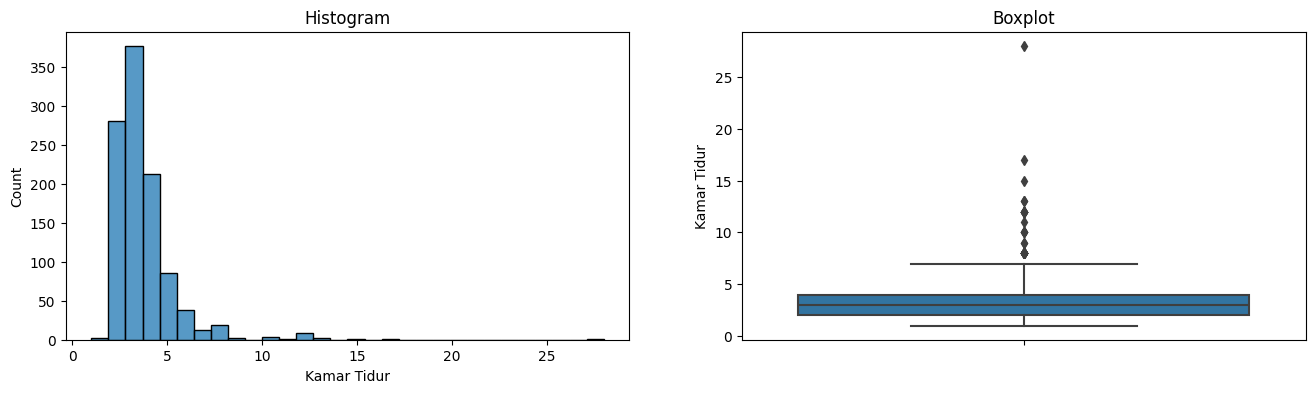


Kamar Tidur - After Capping


C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


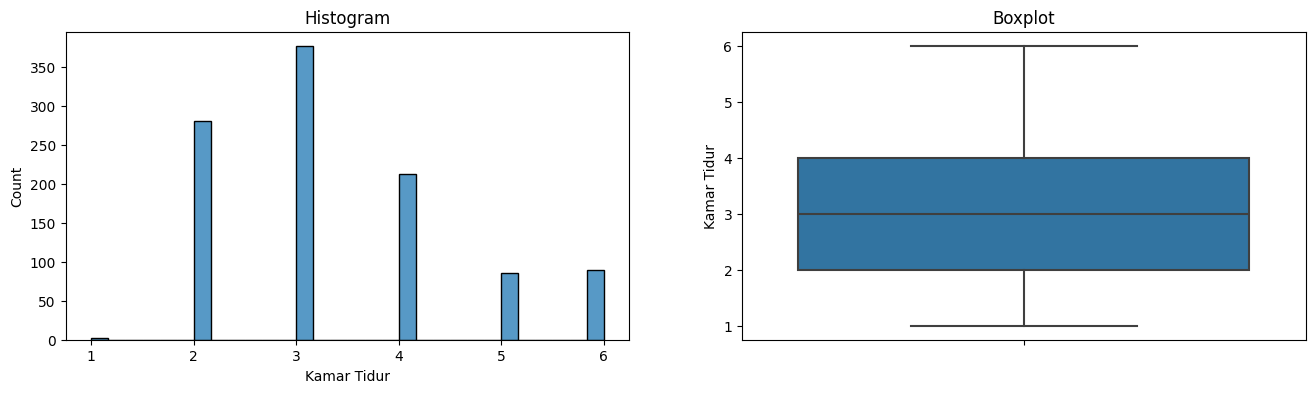

Kamar Mandi - Before Capping


C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


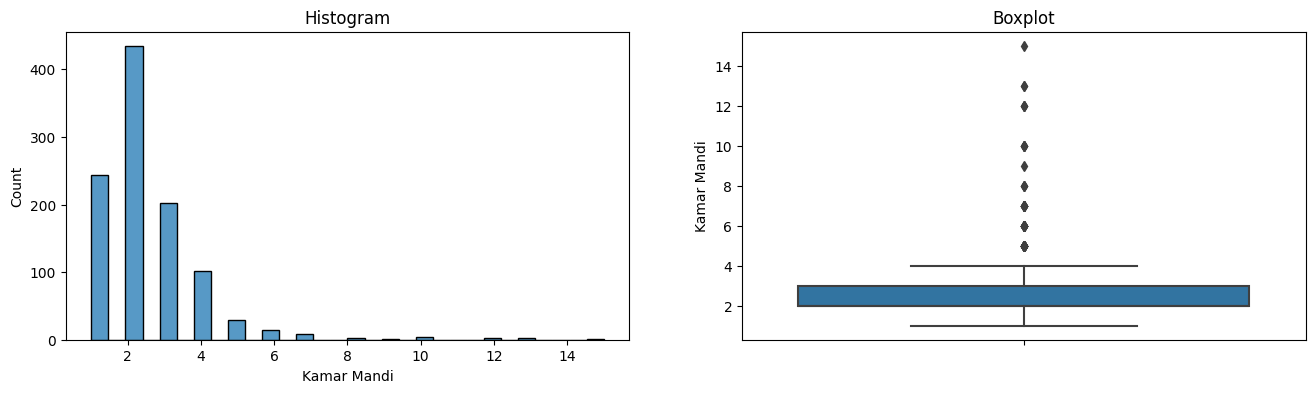


Kamar Mandi - After Capping


C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


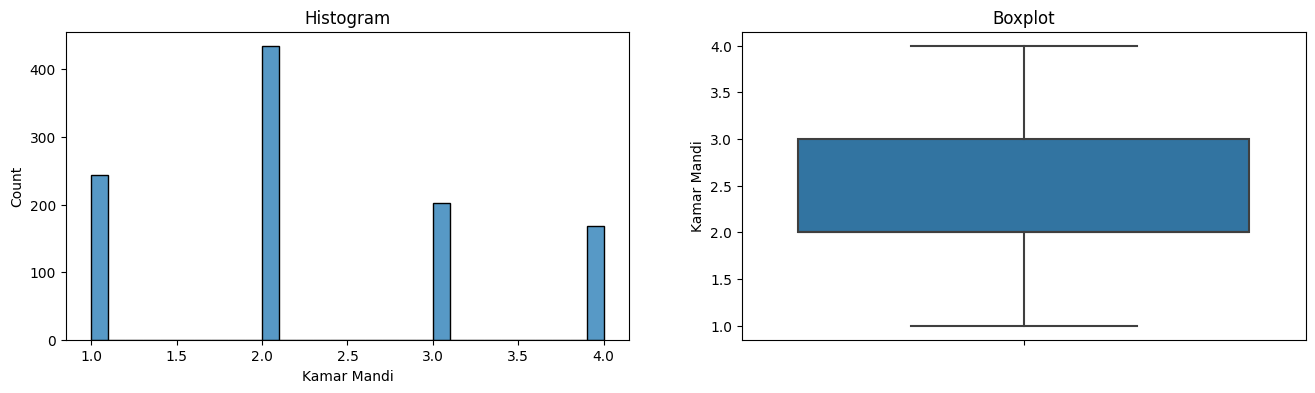

Luas Tanah - Before Capping


C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


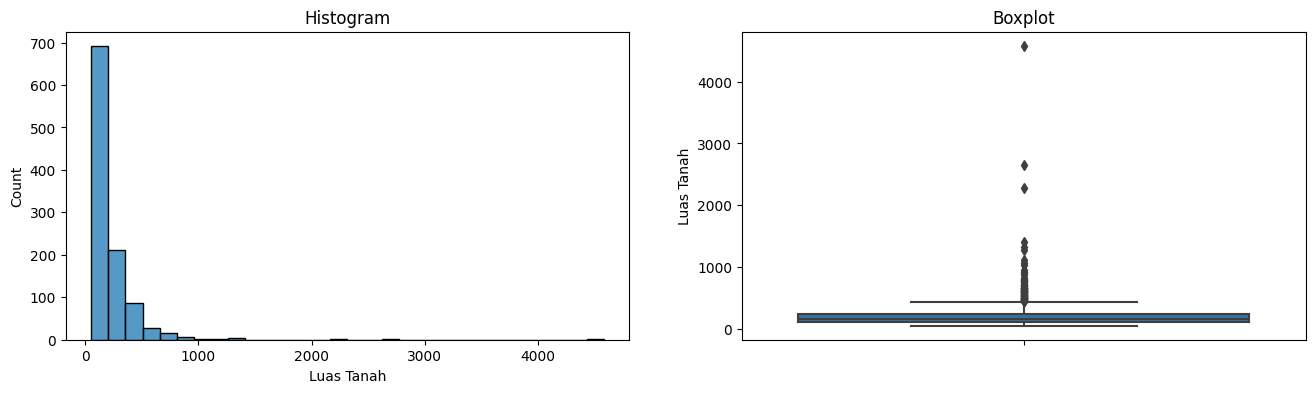


Luas Tanah - After Capping


C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


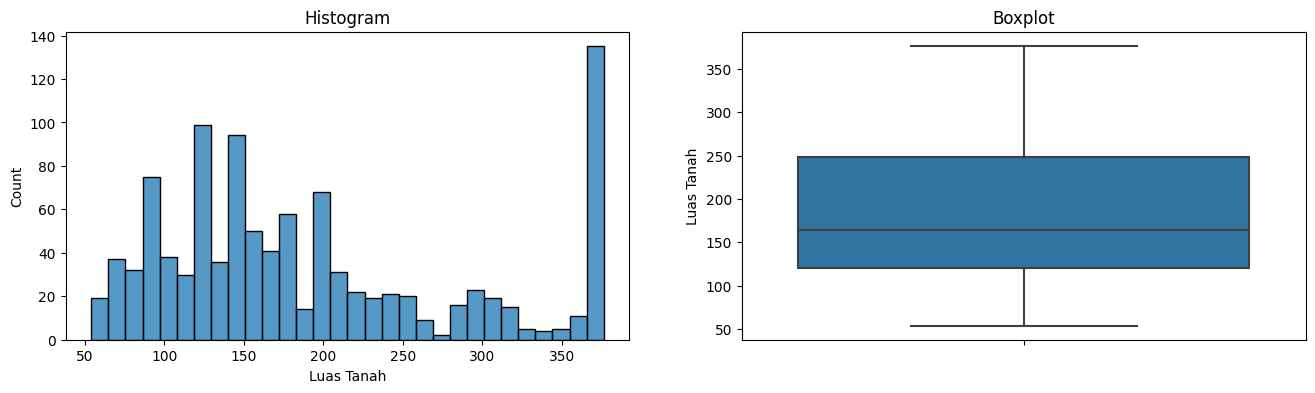

Luas Bangunan - Before Capping


C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


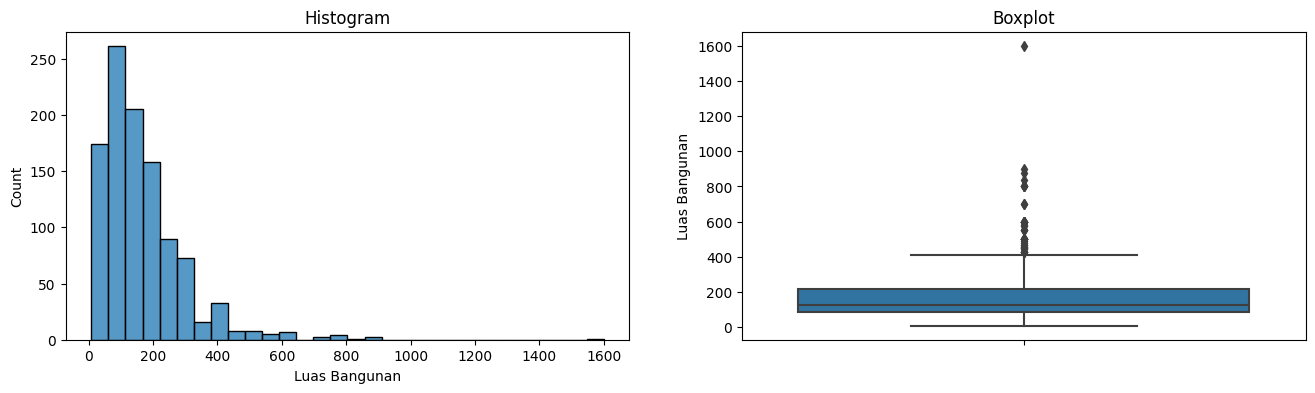


Luas Bangunan - After Capping


C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


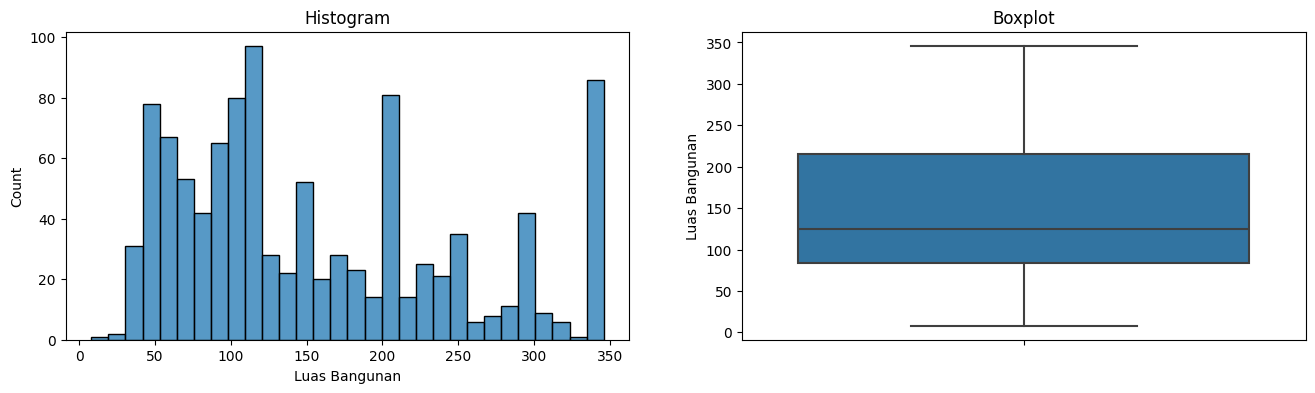

Daya Listrik - Before Capping


C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


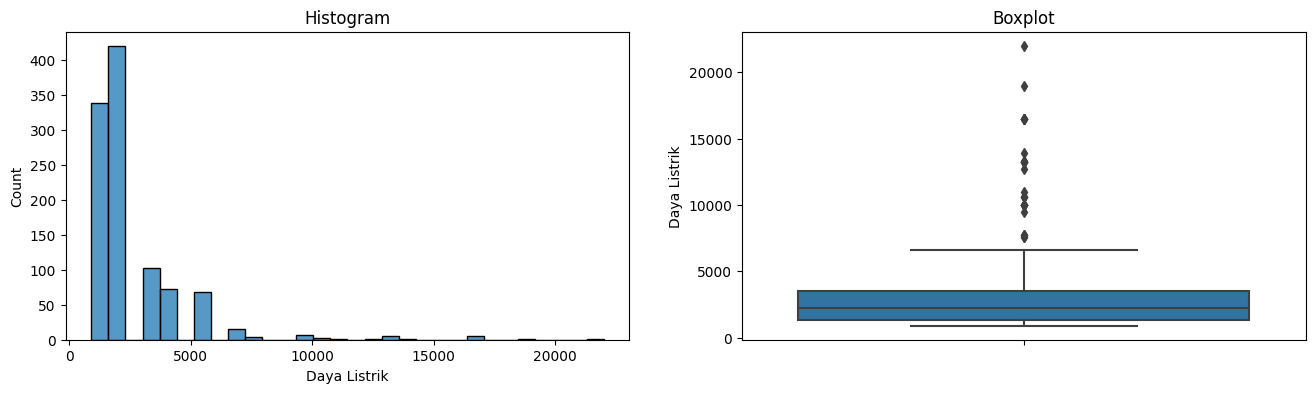


Daya Listrik - After Capping


C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


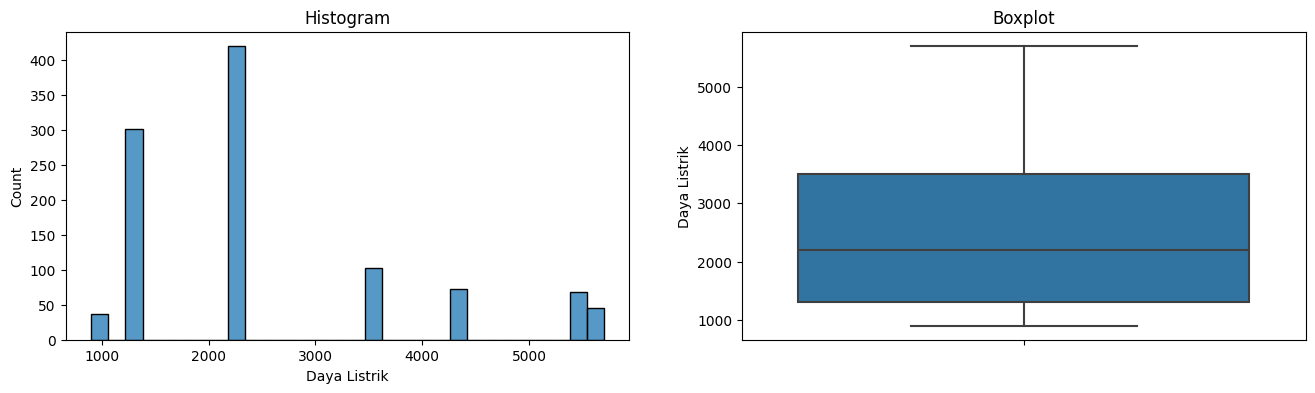

In [14]:
# Check the distribution before and after capping
for col in num_cols:
  print(f'{col} - Before Capping')
  diagnostic_plots(X_train, col)

  print(f'\n{col} - After Capping')
  diagnostic_plots(X_train_capped, col)

In [15]:
X_test.isnull().sum()

Lokasi           0
Kamar Tidur      0
Kamar Mandi      0
Luas Tanah       0
Luas Bangunan    0
Sertifikat       0
Daya Listrik     0
dtype: int64

In [16]:
y_train.isnull().sum()

0

In [17]:
X_train

,Lokasi,Kamar Tidur,Kamar Mandi,Luas Tanah,Luas Bangunan,Sertifikat,Daya Listrik
449,"Balikpapan Selatan, Balikpapan",2.0,1.0,144,72,SHM - Sertifikat Hak Milik,1300
895,"Sumber Rejo, Balikpapan",3.0,1.0,78,42,SHM - Sertifikat Hak Milik,1300
411,"Balikpapan Baru, Balikpapan",3.0,1.0,120,93,SHM - Sertifikat Hak Milik,5500
995,"Balikpapan Kota, Balikpapan",6.0,4.0,150,174,SHM - Sertifikat Hak Milik,3500
1014,"Balikpapan Baru, Balikpapan",4.0,2.0,230,200,SHM - Sertifikat Hak Milik,2200
...,...,...,...,...,...,...,...
1292,"Damai, Balikpapan",5.0,5.0,280,226,SHM - Sertifikat Hak Milik,4400
1016,"Balikpapan Baru, Balikpapan",3.0,3.0,198,198,SHM - Sertifikat Hak Milik,3500
165,"Balikpapan Selatan, Balikpapan",3.0,2.0,165,250,SHM - Sertifikat Hak Milik,2200
7,"Balikpapan Utara, Balikpapan",6.0,4.0,396,400,SHM - Sertifikat Hak Milik,4400


### Split Between Num col and Cat col

In [18]:
#get numeric and categorical column

num_columns = X_train.select_dtypes(include = np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include = ['object']).columns.tolist()

print('Numeric Columns: ', num_columns)
print('Categorical Columns: ', cat_columns)

Numeric Columns:  ['Kamar Tidur', 'Kamar Mandi', 'Luas Tanah', 'Luas Bangunan', 'Daya Listrik']
Categorical Columns:  ['Lokasi', 'Sertifikat']


In [19]:
# Split numerical columns and categorical columns

X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

X_train_num

,Kamar Tidur,Kamar Mandi,Luas Tanah,Luas Bangunan,Daya Listrik
449,2.0,1.0,144,72,1300
895,3.0,1.0,78,42,1300
411,3.0,1.0,120,93,5500
995,6.0,4.0,150,174,3500
1014,4.0,2.0,230,200,2200
...,...,...,...,...,...
1292,5.0,5.0,280,226,4400
1016,3.0,3.0,198,198,3500
165,3.0,2.0,165,250,2200
7,6.0,4.0,396,400,4400


In [20]:
# Feature selection Numerical columns
p_values = []
interpretasi = []
cols = []

for col in X_train_num.columns:
  corr_coef, p_value = pearsonr(X_train_num[col], y_train)

  p_values.append(p_value)
  cols.append(col)

  if p_value < 0.05:
    interpretasi.append('ada korelasi')
  else :
    interpretasi.append('ga ada korelasi')

pd.DataFrame({'nama kolom':cols,
              'hasil': interpretasi})


,nama kolom,hasil
0,Kamar Tidur,ada korelasi
1,Kamar Mandi,ada korelasi
2,Luas Tanah,ada korelasi
3,Luas Bangunan,ada korelasi
4,Daya Listrik,ada korelasi


In [21]:
# Feature selection Kategorical columns
p_values = []
interpretasi = []
cols = []

for col in X_train_cat.columns:
  corr_coef, p_value = kendalltau(X_train_cat[col], y_train)

  p_values.append(p_value)
  cols.append(col)

  if p_value < 0.05:
    interpretasi.append('ada korelasi')
  else :
    interpretasi.append('ga ada korelasi')

pd.DataFrame({'nama kolom':cols,
              'hasil': interpretasi})


,nama kolom,hasil
0,Lokasi,ada korelasi
1,Sertifikat,ada korelasi


## Model Definition

In [22]:
#Making column transformer for preprocessing
transformer = ColumnTransformer([
    ('scaler', StandardScaler(), selector(dtype_exclude='object')),
    ('encoding', OneHotEncoder(), selector(dtype_include='object'))
])

# #Making pipeline for catboost
# pipe_catboost = Pipeline([
# ('transformer', transformer),
# ('classifier', CatBoostClassifier())
# ])

# Making pipeline for LightGBM
pipe_lgbm = Pipeline([
    # ('transformer', transformer),
    ('classifier', LGBMRegressor(num_leaves=32))
])

# Making pipeline for XGBoost
pipe_xgb = Pipeline([
    # ('transformer', transformer),
    ('classifier', XGBRegressor(n_estimators=3000, max_depth=3))
])

# Making pipeline for Random Forest
pipe_rf = Pipeline([
    # ('transformer', transformer),
    ('classifier', RandomForestRegressor(
        n_estimators=100,
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        random_state=42
    ))
])

# Making pipeline for Linear Regression
pipe_log = Pipeline([
    # ('transformer', transformer),
    ('regressor', LogisticRegression(
        random_state=42
    ))
])

pipe_tree_reg = Pipeline([
    # ('transformer', transformer),  # Uncomment and replace with your transformer
    ('regressor', DecisionTreeRegressor(
        random_state=42,
        max_depth=5,               
        min_samples_split=2        
    ))
])

pipe_svm = Pipeline([
    ('regressor', SVR(
        kernel='rbf',     # Radial Basis Function kernel
        C=1.0,            # Regularization parameter
        epsilon=0.1       # Epsilon parameter in the SVR model
    ))
])

pipe_lasso_reg = Pipeline([
    ('regressor', Lasso(
        alpha=0.5,         # Regularization parameter
        fit_intercept=True, # Fit the intercept or not
        random_state=42    # Seed for reproducibility
    ))
])

pipe_gb_reg = Pipeline([
    ('regressor', GradientBoostingRegressor(
        loss='huber',           # Loss function to be optimized ('ls' for least squares regression)
        learning_rate=0.1,    # Step size shrinkage used to prevent overfitting
        n_estimators=100,     # Number of boosting stages to be run
        max_depth=3,          # Maximum depth of the individual trees
        min_samples_split=2,  # Minimum number of samples required to split an internal node
        min_samples_leaf=1,   # Minimum number of samples required to be at a leaf node
        subsample=1.0,        # Fraction of samples used for fitting the trees
        random_state=42 
    ))
])

pipe_ridge = Pipeline([
    ('regressor', Ridge(
        alpha=1.0,         # Regularization strength (L2 penalty term)
        fit_intercept=True, # Fit the intercept or not
        solver='auto',     # Solver to use for fitting the model
        random_state=42    # Seed for reproducibility
    ))
])

pipe_knn_reg = Pipeline([
    # ('scaler', StandardScaler()),  # Standardize features by removing the mean and scaling to unit variance
    ('regressor', KNeighborsRegressor(
        n_neighbors=5,     # Number of neighbors to use for kneighbors queries
        weights='uniform', # Weight function used in prediction ('uniform' or 'distance')
        algorithm='auto',  # Algorithm used to compute the nearest neighbors
        p=2,               # Power parameter for Minkowski metric (p=2 for Euclidean distance)
        leaf_size=30       # Leaf size passed to BallTree or KDTree
    ))
])

In [23]:
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)

## Base Model Evaluation

### LGBMRegressor

In [24]:
model_lgbm = pipe_lgbm.fit(X_train_transformed, y_train)
print('Training Score: ',round(pipe_lgbm.score(X_train_transformed, y_train),4))
print('Testing Score: ', round(pipe_lgbm.score(X_test_transformed, y_test),4))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000731 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 309
[LightGBM] [Info] Number of data points in the train set: 1048, number of used features: 15
[LightGBM] [Info] Start training from score 1960.448473
Training Score:  0.8157
Testing Score:  0.6682


In [25]:
y_pred_lgbm_train = model_lgbm.predict(X_train_transformed)

y_pred_lgbm_test = model_lgbm.predict(X_test_transformed)

In [26]:
print('Results for Train Data:')
print(f'MAE Train : {mean_absolute_error(y_train,y_pred_lgbm_train)}')
print(f'MSE Train : {mean_squared_error(y_train,y_pred_lgbm_train)}')
print(f'RMSE Train : {np.sqrt(mean_squared_error(y_train,y_pred_lgbm_train))}')
print(f'MAPE Train : {mean_absolute_percentage_error(y_train,y_pred_lgbm_train)}')

Results for Train Data:
MAE Train : 364.3554807582371
MSE Train : 665087.521431113
RMSE Train : 815.528982581927
MAPE Train : 0.24021822781187271


In [27]:
print('Resutls for Test Data')
print(f'MAE Test : {mean_absolute_error(y_test,y_pred_lgbm_test)}')
print(f'MSE Test : {mean_squared_error(y_test,y_pred_lgbm_test)}')
print(f'RMSE Test : {np.sqrt(mean_squared_error(y_test,y_pred_lgbm_test))}')
print(f'MAPE Test : {mean_absolute_percentage_error(y_test,y_pred_lgbm_test)}')

Resutls for Test Data
MAE Test : 633.7253619193407
MSE Test : 2222246.674021681
RMSE Test : 1490.7201863601636
MAPE Test : 0.3004733455459559


### XGBRegressor

In [28]:
model = XGBRegressor()

# define model evaluation method
cv = StratifiedKFold(n_splits=10)
# evaluate model
scores = cross_val_score(model, X_train_transformed, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )
# print('Rmse:', round(mean_squared_log_error(y_pred, y_train) ** 0.5, 5))

model_xgb = pipe_xgb.fit(X_train_transformed, y_train)

print('Training Score: ', round(pipe_xgb.score(X_train_transformed, y_train), 4))
print('Testing Score: ', round(pipe_xgb.score(X_test_transformed, y_test), 4))

C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Mean MAE: 567.415 (98.810)
Training Score:  0.9983
Testing Score:  0.6699


In [29]:
y_pred_xgb_train = model_xgb.predict(X_train_transformed)

y_pred_xgb_test = model_xgb.predict(X_test_transformed)

In [30]:
print('Results for Train Data:')
print(f'MAE Train : {mean_absolute_error(y_train,y_pred_xgb_train)}')
print(f'MSE Train : {mean_squared_error(y_train,y_pred_xgb_train)}')
print(f'RMSE Train : {np.sqrt(mean_squared_error(y_train,y_pred_xgb_train))}')
print(f'MAPE Train : {mean_absolute_percentage_error(y_train,y_pred_xgb_train)}')

Results for Train Data:
MAE Train : 38.0257770378171
MSE Train : 6086.396194282478
RMSE Train : 78.01535870764472
MAPE Train : 0.049168185513496165


In [31]:
print('Resutls for Test Data')
print(f'MAE Test : {mean_absolute_error(y_test,y_pred_xgb_test)}')
print(f'MSE Test : {mean_squared_error(y_test,y_pred_xgb_test)}')
print(f'RMSE Test : {np.sqrt(mean_squared_error(y_test,y_pred_xgb_test))}')
print(f'MAPE Test : {mean_absolute_percentage_error(y_test,y_pred_xgb_test)}')

Resutls for Test Data
MAE Test : 747.2487533511096
MSE Test : 2210319.1817265395
RMSE Test : 1486.7142232878987
MAPE Test : 0.3556791684878885


### Random Forest

In [32]:
model_rf = pipe_rf.fit(X_train_transformed, y_train)
print('Training Score: ',round(pipe_rf.score(X_train_transformed, y_train),4))
print('Testing Score: ', round(pipe_rf.score(X_test_transformed, y_test),4))

Training Score:  0.9492
Testing Score:  0.7784


In [33]:
y_pred_rf_train = model_rf.predict(X_train_transformed)
y_pred_rf_test = model_rf.predict(X_test_transformed)

In [34]:
print('Results for Train Data:')
print(f'MAE Train : {mean_absolute_error(y_train,y_pred_rf_train)}')
print(f'MSE Train : {mean_squared_error(y_train,y_pred_rf_train)}')
print(f'RMSE Train : {np.sqrt(mean_squared_error(y_train,y_pred_rf_train))}')
print(f'MAPE Train : {mean_absolute_percentage_error(y_train,y_pred_rf_train)}')

Results for Train Data:
MAE Train : 208.86778218044677
MSE Train : 183356.3866671037
RMSE Train : 428.20133893660784
MAPE Train : 0.15090628005073375


In [35]:
print('Resutls for Test Data')
print(f'MAE Test : {mean_absolute_error(y_test,y_pred_rf_test)}')
print(f'MSE Test : {mean_squared_error(y_test,y_pred_rf_test)}')
print(f'RMSE Test : {np.sqrt(mean_squared_error(y_test,y_pred_rf_test))}')
print(f'MAPE Test : {mean_absolute_percentage_error(y_test,y_pred_rf_test)}')

Resutls for Test Data
MAE Test : 573.3914384163336
MSE Test : 1483823.6482437642
RMSE Test : 1218.1230020994449
MAPE Test : 0.28781722948058586


### Logistic Reggression

In [36]:
model_log = pipe_log.fit(X_train_transformed, y_train)
print('Training Score: ',round(model_log.score(X_train_transformed, y_train),4))
print('Testing Score: ', round(model_log.score(X_test_transformed, y_test),4))

Training Score:  0.1842
Testing Score:  0.0611


C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Decision Tree Reggression

In [37]:
model_dt = pipe_tree_reg.fit(X_train_transformed, y_train)
print('Training Score: ',round(pipe_tree_reg.score(X_train_transformed, y_train),4))
print('Testing Score: ', round(pipe_tree_reg.score(X_test_transformed, y_test),4))

Training Score:  0.7227
Testing Score:  0.6817


In [38]:
y_pred_dt_train = model_dt.predict(X_train_transformed)
y_pred_dt_test = model_dt.predict(X_test_transformed)

In [39]:
print('Results for Train Data:')
print(f'MAE Train : {mean_absolute_error(y_train,y_pred_dt_train)}')
print(f'MSE Train : {mean_squared_error(y_train,y_pred_dt_train)}')
print(f'RMSE Train : {np.sqrt(mean_squared_error(y_train,y_pred_dt_train))}')
print(f'MAPE Train : {mean_absolute_percentage_error(y_train,y_pred_dt_train)}')

Results for Train Data:
MAE Train : 607.4294447776915
MSE Train : 1001022.392432494
RMSE Train : 1000.5110656222118
MAPE Train : 0.4320354112833127


In [40]:
print('Resutls for Test Data')
print(f'MAE Test : {mean_absolute_error(y_test,y_pred_dt_test)}')
print(f'MSE Test : {mean_squared_error(y_test,y_pred_dt_test)}')
print(f'RMSE Test : {np.sqrt(mean_squared_error(y_test,y_pred_dt_test))}')
print(f'MAPE Test : {mean_absolute_percentage_error(y_test,y_pred_dt_test)}')

Resutls for Test Data
MAE Test : 768.7604950657108
MSE Test : 2131801.375493844
RMSE Test : 1460.0689625815091
MAPE Test : 0.4110536944801863


In [41]:
model_svm = pipe_svm.fit(X_train_transformed, y_train)
print('Training Score: ',round(pipe_svm.score(X_train_transformed, y_train),4))
print('Testing Score: ', round(pipe_svm.score(X_test_transformed, y_test),4))

Training Score:  -0.0354
Testing Score:  -0.0587


In [42]:
y_pred_svm_train = model_svm.predict(X_train_transformed)
y_pred_svm_test = model_svm.predict(X_test_transformed)

In [43]:
print('Results for Train Data:')
print(f'MAE Train : {mean_absolute_error(y_train,y_pred_svm_train)}')
print(f'MSE Train : {mean_squared_error(y_train,y_pred_svm_train)}')
print(f'RMSE Train : {np.sqrt(mean_squared_error(y_train,y_pred_svm_train))}')
print(f'MAPE Train : {mean_absolute_percentage_error(y_train,y_pred_svm_train)}')

Results for Train Data:
MAE Train : 1057.387755884549
MSE Train : 3737150.195093071
RMSE Train : 1933.1710206531318
MAPE Train : 0.6505892724548082


In [44]:
print('Resutls for Test Data')
print(f'MAE Test : {mean_absolute_error(y_test,y_pred_svm_test)}')
print(f'MSE Test : {mean_squared_error(y_test,y_pred_svm_test)}')
print(f'RMSE Test : {np.sqrt(mean_squared_error(y_test,y_pred_svm_test))}')
print(f'MAPE Test : {mean_absolute_percentage_error(y_test,y_pred_svm_test)}')

Resutls for Test Data
MAE Test : 1283.7616876756908
MSE Test : 7089707.540822036
RMSE Test : 2662.650472897642
MAPE Test : 0.6227442009333468


### Lasso Regression

In [45]:
model_lasso = pipe_lasso_reg.fit(X_train_transformed, y_train)
print('Training Score: ',round(pipe_lasso_reg.score(X_train_transformed, y_train),4))
print('Testing Score: ', round(pipe_lasso_reg.score(X_test_transformed, y_test),4))

Training Score:  0.6974
Testing Score:  0.5426


In [46]:
y_pred_lasso_train = model_lasso.predict(X_train_transformed)
y_pred_lasso_test = model_lasso.predict(X_test_transformed)

In [47]:
print('Results for Train Data:')
print(f'MAE Train : {mean_absolute_error(y_train,y_pred_lasso_train)}')
print(f'MSE Train : {mean_squared_error(y_train,y_pred_lasso_train)}')
print(f'RMSE Train : {np.sqrt(mean_squared_error(y_train,y_pred_lasso_train))}')
print(f'MAPE Train : {mean_absolute_percentage_error(y_train,y_pred_lasso_train)}')

Results for Train Data:
MAE Train : 643.5051209613961
MSE Train : 1092060.0051249326
RMSE Train : 1045.016748729384
MAPE Train : 0.43479251440412475


In [48]:
print('Resutls for Test Data')
print(f'MAE Test : {mean_absolute_error(y_test,y_pred_lasso_test)}')
print(f'MSE Test : {mean_squared_error(y_test,y_pred_lasso_test)}')
print(f'RMSE Test : {np.sqrt(mean_squared_error(y_test,y_pred_lasso_test))}')
print(f'MAPE Test : {mean_absolute_percentage_error(y_test,y_pred_lasso_test)}')

Resutls for Test Data
MAE Test : 733.9409373490098
MSE Test : 3063307.3702449994
RMSE Test : 1750.2306620114389
MAPE Test : 0.3937553346733914


### Gradient Boosting Regression

In [49]:
model_gbr = pipe_gb_reg.fit(X_train_transformed, y_train)
print('Training Score: ',round(pipe_gb_reg.score(X_train_transformed, y_train),4))
print('Testing Score: ', round(pipe_gb_reg.score(X_test_transformed, y_test),4))

Training Score:  0.8316
Testing Score:  0.7522


In [50]:
y_pred_gbr_train = model_gbr.predict(X_train_transformed)
y_pred_gbr_test = model_gbr.predict(X_test_transformed)

In [51]:
print('Results for Train Data:')
print(f'MAE Train : {mean_absolute_error(y_train,y_pred_gbr_train)}')
print(f'MSE Train : {mean_squared_error(y_train,y_pred_gbr_train)}')
print(f'RMSE Train : {np.sqrt(mean_squared_error(y_train,y_pred_gbr_train))}')
print(f'MAPE Train : {mean_absolute_percentage_error(y_train,y_pred_gbr_train)}')

Results for Train Data:
MAE Train : 459.9490742745922
MSE Train : 607800.18046296
RMSE Train : 779.6154054807794
MAPE Train : 0.321855435953486


In [52]:
print('Resutls for Test Data')
print(f'MAE Test : {mean_absolute_error(y_test,y_pred_gbr_test)}')
print(f'MSE Test : {mean_squared_error(y_test,y_pred_gbr_test)}')
print(f'RMSE Test : {np.sqrt(mean_squared_error(y_test,y_pred_gbr_test))}')
print(f'MAPE Test : {mean_absolute_percentage_error(y_test,y_pred_gbr_test)}')

Resutls for Test Data
MAE Test : 659.9784529016242
MSE Test : 1659135.8843038247
RMSE Test : 1288.0744870945255
MAPE Test : 0.3310304950647494


### Ridge Regressor

In [53]:
model_ridge = pipe_ridge.fit(X_train_transformed, y_train)
print('Training Score: ',round(pipe_ridge.score(X_train_transformed, y_train),4))
print('Testing Score: ', round(pipe_ridge.score(X_test_transformed, y_test),4))

Training Score:  0.697
Testing Score:  0.5353


In [54]:
y_pred_ridge_train = model_ridge.predict(X_train_transformed)
y_pred_ridge_test = model_ridge.predict(X_test_transformed)

In [55]:
print('Results for Train Data:')
print(f'MAE Train : {mean_absolute_error(y_train,y_pred_ridge_train)}')
print(f'MSE Train : {mean_squared_error(y_train,y_pred_ridge_train)}')
print(f'RMSE Train : {np.sqrt(mean_squared_error(y_train,y_pred_ridge_train))}')
print(f'MAPE Train : {mean_absolute_percentage_error(y_train,y_pred_ridge_train)}')

Results for Train Data:
MAE Train : 642.7813626034872
MSE Train : 1093710.520853363
RMSE Train : 1045.8061583550573
MAPE Train : 0.43370712738369055


In [56]:
print('Resutls for Test Data')
print(f'MAE Test : {mean_absolute_error(y_test,y_pred_ridge_test)}')
print(f'MSE Test : {mean_squared_error(y_test,y_pred_ridge_test)}')
print(f'RMSE Test : {np.sqrt(mean_squared_error(y_test,y_pred_ridge_test))}')
print(f'MAPE Test : {mean_absolute_percentage_error(y_test,y_pred_ridge_test)}')

Resutls for Test Data
MAE Test : 732.856791521505
MSE Test : 3112226.7673763735
RMSE Test : 1764.1504378528418
MAPE Test : 0.39050012285666935


### KNN Regression

In [57]:
model_knn = pipe_knn_reg.fit(X_train_transformed, y_train)
print('Training Score: ',round(pipe_knn_reg.score(X_train_transformed, y_train),4))
print('Testing Score: ', round(pipe_knn_reg.score(X_test_transformed, y_test),4))

Training Score:  0.6977
Testing Score:  0.5739


In [58]:
y_pred_knn_train = model_knn.predict(X_train_transformed)
y_pred_knn_test = model_knn.predict(X_test_transformed)

In [59]:
print('Results for Train Data:')
print(f'MAE Train : {mean_absolute_error(y_train,y_pred_knn_train)}')
print(f'MSE Train : {mean_squared_error(y_train,y_pred_knn_train)}')
print(f'RMSE Train : {np.sqrt(mean_squared_error(y_train,y_pred_knn_train))}')
print(f'MAPE Train : {mean_absolute_percentage_error(y_train,y_pred_knn_train)}')

Results for Train Data:
MAE Train : 538.3875954198473
MSE Train : 1091139.1263740459
RMSE Train : 1044.5760510245511
MAPE Train : 0.3390343792087442


In [60]:
print('Resutls for Test Data')
print(f'MAE Test : {mean_absolute_error(y_test,y_pred_knn_test)}')
print(f'MSE Test : {mean_squared_error(y_test,y_pred_knn_test)}')
print(f'RMSE Test : {np.sqrt(mean_squared_error(y_test,y_pred_knn_test))}')
print(f'MAPE Test : {mean_absolute_percentage_error(y_test,y_pred_knn_test)}')

Resutls for Test Data
MAE Test : 766.0496183206106
MSE Test : 2853289.412671756
RMSE Test : 1689.168260615785
MAPE Test : 0.3577913950606096


## Compare Models

In [101]:
# compile all result in a dataframe

results = pd.DataFrame({
    'Model': ['LightGBM', 'XGBoost', 'Random Forest', 'Logistic Regression', 'Decision Tree', 'Lasso Reggresion','Gradient Boosting Regression','Ridge Regressor', 'KNN Regression'],
    'Training Score': [model_lgbm.score(X_train_transformed, y_train), model_xgb.score(X_train_transformed, y_train), model_rf.score(X_train_transformed, y_train), model_log.score(X_train_transformed, y_train), model_dt.score(X_train_transformed, y_train), 
                       model_lasso.score(X_train_transformed, y_train),model_gbr.score(X_train_transformed, y_train),model_ridge.score(X_train_transformed, y_train),model_knn.score(X_train_transformed, y_train)],
    'Testing Score':  [model_lgbm.score(X_test_transformed, y_test), model_xgb.score(X_test_transformed, y_test), model_rf.score(X_test_transformed, y_test), model_log.score(X_test_transformed, y_test), model_dt.score(X_test_transformed, y_test), 
                       model_lasso.score(X_test_transformed, y_test),model_gbr.score(X_test_transformed, y_test),model_ridge.score(X_test_transformed, y_test),model_knn.score(X_test_transformed, y_test)],
   })

result_train = pd.DataFrame({
    'Model': ['LightGBM', 'XGBoost', 'Random Forest', 'Logistic Regression', 'Decision Tree', 'Lasso Reggresion','Gradient Boosting Regression','Ridge Regressor', 'KNN Regression'],
    'MAE Train': [mean_absolute_error(y_train,y_pred_lgbm_train), mean_absolute_error(y_train,y_pred_xgb_train), mean_absolute_error(y_train,y_pred_rf_train), mean_absolute_error(y_train,y_pred_dt_train), 
                  mean_absolute_error(y_train,y_pred_lasso_train), mean_absolute_error(y_train,y_pred_gbr_train), mean_absolute_error(y_train,y_pred_ridge_train), mean_absolute_error(y_train,y_pred_knn_train), mean_absolute_error(y_train,model_log.predict(X_train_transformed))],

    'MSE Train': [mean_squared_error(y_train,y_pred_lgbm_train), mean_squared_error(y_train,y_pred_xgb_train), mean_squared_error(y_train,y_pred_rf_train), mean_absolute_error(y_train,y_pred_dt_train), 
                  mean_squared_error(y_train,y_pred_lasso_train), mean_squared_error(y_train,y_pred_gbr_train), mean_squared_error(y_train,y_pred_ridge_train), mean_squared_error(y_train,y_pred_knn_train), mean_squared_error(y_train,model_log.predict(X_train_transformed))],

    'RMSE Train': [np.sqrt(mean_squared_error(y_train,y_pred_lgbm_train)), np.sqrt(mean_squared_error(y_train,y_pred_xgb_train)), np.sqrt(mean_squared_error(y_train,y_pred_rf_train)), np.sqrt(mean_absolute_error(y_train,y_pred_dt_train)),
                   np.sqrt(mean_squared_error(y_train,y_pred_lasso_train)), np.sqrt(mean_squared_error(y_train,y_pred_gbr_train)), np.sqrt(mean_squared_error(y_train,y_pred_ridge_train)), np.sqrt(mean_squared_error(y_train,y_pred_knn_train)), np.sqrt(mean_squared_error(y_train,model_log.predict(X_train_transformed)))],

    'MAPE Train': [mean_absolute_percentage_error(y_train,y_pred_lgbm_train), mean_absolute_percentage_error(y_train,y_pred_xgb_train), mean_absolute_percentage_error(y_train,y_pred_rf_train), mean_absolute_error(y_train,y_pred_dt_train), 
                  mean_absolute_percentage_error(y_train,y_pred_lasso_train), mean_absolute_percentage_error(y_train,y_pred_gbr_train), mean_absolute_percentage_error(y_train,y_pred_ridge_train), mean_absolute_percentage_error(y_train,y_pred_knn_train), mean_absolute_percentage_error(y_train,model_log.predict(X_train_transformed))]
   })

result_test = pd.DataFrame({
    'Model': ['LightGBM', 'XGBoost', 'Random Forest', 'Logistic Regression', 'SVM', 'Lasso', 'Gradient Boosting', 'Ridge', 'KNN'],
    'MAE': [mean_absolute_error(y_test,y_pred_lgbm_test), mean_absolute_error(y_test,y_pred_xgb_test), mean_absolute_error(y_test,y_pred_rf_test), mean_absolute_error(y_test,y_pred_dt_test), mean_absolute_error(y_test,y_pred_svm_test), mean_absolute_error(y_test,y_pred_lasso_test), mean_absolute_error(y_test,y_pred_gbr_test), mean_absolute_error(y_test,y_pred_ridge_test), mean_absolute_error(y_test,y_pred_knn_test)],
    'MSE': [mean_squared_error(y_test,y_pred_lgbm_test), mean_squared_error(y_test,y_pred_xgb_test), mean_squared_error(y_test,y_pred_rf_test), mean_squared_error(y_test,y_pred_dt_test), mean_squared_error(y_test,y_pred_svm_test), mean_squared_error(y_test,y_pred_lasso_test), mean_squared_error(y_test,y_pred_gbr_test), mean_squared_error(y_test,y_pred_ridge_test), mean_squared_error(y_test,y_pred_knn_test)],
    'RMSE': [np.sqrt(mean_squared_error(y_test,y_pred_lgbm_test)), np.sqrt(mean_squared_error(y_test,y_pred_xgb_test)), np.sqrt(mean_squared_error(y_test,y_pred_rf_test)), np.sqrt(mean_squared_error(y_test,y_pred_dt_test)), np.sqrt(mean_squared_error(y_test,y_pred_svm_test)), np.sqrt(mean_squared_error(y_test,y_pred_lasso_test)), np.sqrt(mean_squared_error(y_test,y_pred_gbr_test)), np.sqrt(mean_squared_error(y_test,y_pred_ridge_test)), np.sqrt(mean_squared_error(y_test,y_pred_knn_test))],
    'MAPE': [mean_absolute_percentage_error(y_test,y_pred_lgbm_test), mean_absolute_percentage_error(y_test,y_pred_xgb_test), mean_absolute_percentage_error(y_test,y_pred_rf_test), mean_absolute_percentage_error(y_test,y_pred_dt_test), mean_absolute_percentage_error(y_test,y_pred_svm_test), mean_absolute_percentage_error(y_test,y_pred_lasso_test), mean_absolute_percentage_error(y_test,y_pred_gbr_test), mean_absolute_percentage_error(y_test,y_pred_ridge_test), mean_absolute_percentage_error(y_test,y_pred_knn_test)]
})

In [62]:
results

,Model,Training Score,Testing Score
0,LightGBM,0.815730,0.668158
1,XGBoost,0.998314,0.669939
2,Random Forest,0.949199,0.778425
3,Logistic Regression,0.184160,0.061069
4,Decision Tree,0.722655,0.681664
5,Lasso Reggresion,0.697432,0.542565
6,Gradient Boosting Regression,0.831602,0.752246
7,Ridge Regressor,0.696975,0.535260
8,KNN Regression,0.697687,0.573926


In [63]:
result_train

,Model,MAE Train,MSE Train,RMSE Train,MAPE Train
0,LightGBM,364.355481,6.650875e+05,815.528983,0.240218
1,XGBoost,38.025777,6.086396e+03,78.015359,0.049168
2,Random Forest,208.867782,1.833564e+05,428.201339,0.150906
3,Logistic Regression,607.429445,6.074294e+02,24.646084,607.429445
4,Decision Tree,643.505121,1.092060e+06,1045.016749,0.434793
5,Lasso Reggresion,459.949074,6.078002e+05,779.615405,0.321855
6,Gradient Boosting Regression,642.781363,1.093711e+06,1045.806158,0.433707
7,Ridge Regressor,538.387595,1.091139e+06,1044.576051,0.339034
8,KNN Regression,586.308206,1.115481e+06,1056.163535,0.377906


In [102]:
result_test

,Model,MAE,MSE,RMSE,MAPE
0,LightGBM,633.725362,2.222247e+06,1490.720186,0.300473
1,XGBoost,747.248753,2.210319e+06,1486.714223,0.355679
2,Random Forest,573.391438,1.483824e+06,1218.123002,0.287817
3,Logistic Regression,768.760495,2.131801e+06,1460.068963,0.411054
4,SVM,1283.761688,7.089708e+06,2662.650473,0.622744
5,Lasso,733.940937,3.063307e+06,1750.230662,0.393755
6,Gradient Boosting,659.978453,1.659136e+06,1288.074487,0.331030
7,Ridge,732.856792,3.112227e+06,1764.150438,0.390500
8,KNN,766.049618,2.853289e+06,1689.168261,0.357791


C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


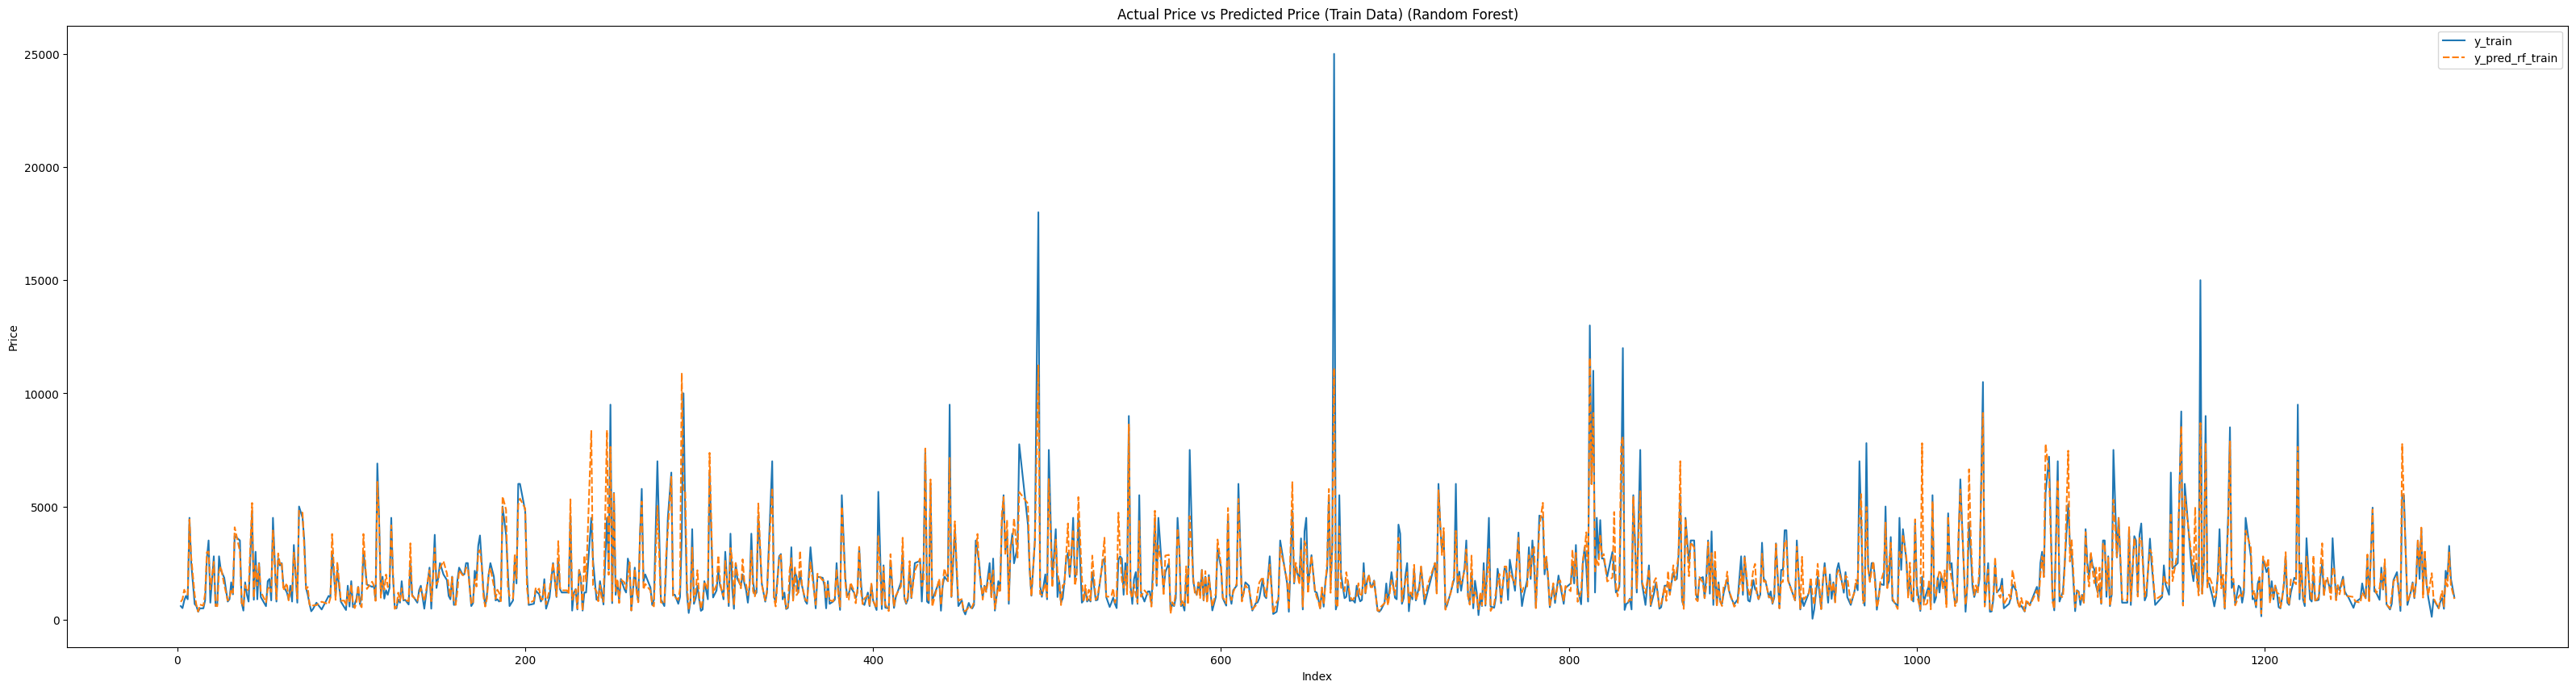

C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


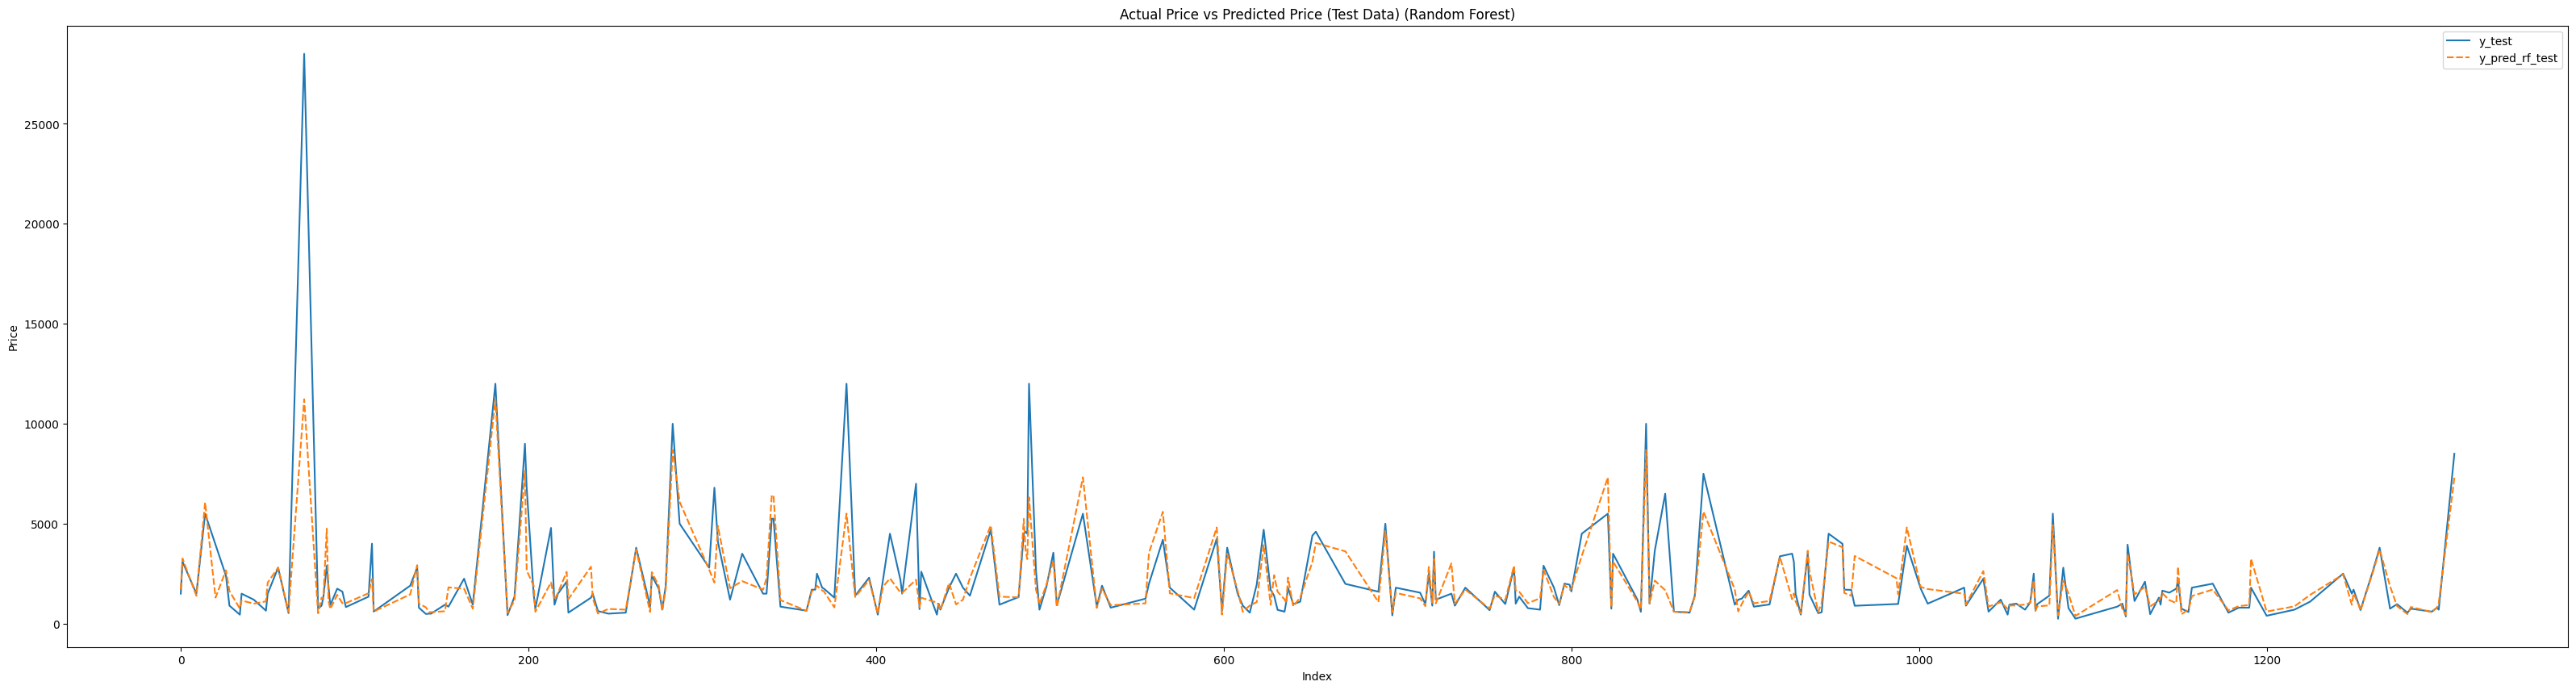

In [65]:
# visualize the y_train and y_train_pred to line chart

plt.figure(figsize=(40,10))
sns.lineplot(data=pd.DataFrame({'y_train':y_train, 'y_pred_rf_train':y_pred_lgbm_train}))
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Actual Price vs Predicted Price (Train Data) (Random Forest)')
plt.show()

# visualize the y_test and y_test_pred

plt.figure(figsize=(40,10))
sns.lineplot(data=pd.DataFrame({'y_test':y_test, 'y_pred_rf_test':y_pred_lgbm_test}))
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Actual Price vs Predicted Price (Test Data) (Random Forest)')
plt.show()



## Param Tuning

### Random Forest Hyperparameter Tuning

In [66]:
##Parameter Tuning

param_rf = {
    'n_estimators': [10, 25, 50, 75, 100],  
    'max_depth': [5, 7, 10, 15],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 5, 10]
}

In [67]:
# grid_rf = GridSearchCV(RandomForestRegressor(), param_rf, cv=5, n_jobs=-1, verbose=1, scoring='neg_mean_absolute_error')

# # Fit the GridSearchCV object with data
# grid_rf.fit(X_train_transformed, y_train)

In [68]:
# grid_rf.best_params_

In [69]:
# use best parameters
model_rf_tuned = RandomForestRegressor(
    n_estimators=500,
    max_depth=9,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    bootstrap =True,
    warm_start = False,
    max_features = 90
)

# fit the model
model_rf_tuned.fit(X_train_transformed, y_train)

# predict the target
y_pred_rf_tuned_train = model_rf_tuned.predict(X_train_transformed)
y_pred_rf_tuned_test = model_rf_tuned.predict(X_test_transformed)

# compile all result in a dataframe

results_rf_tuned = pd.DataFrame({
    'Model': ['Random Forest', 'Random Forest Tuned'],
    'Training Score': [model_rf.score(X_train_transformed, y_train), model_rf_tuned.score(X_train_transformed, y_train)],
    'Testing Score': [model_rf.score(X_test_transformed, y_test), model_rf_tuned.score(X_test_transformed, y_test)],
   })

results_rf_tuned


,Model,Training Score,Testing Score
0,Random Forest,0.949199,0.778425
1,Random Forest Tuned,0.911515,0.773104


### LightGBM Hyperparameter Tuning

In [70]:
param_lgbm = {
    'num_leaves': [20, 30, 40, 50],  
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [5, 7, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1, 0.2]
}

In [71]:
# grid_lgbm = GridSearchCV(LGBMRegressor(), param_lgbm, cv=5, n_jobs=-1, verbose=1, scoring='neg_mean_absolute_error')

# # Fit the GridSearchCV object with data
# grid_lgbm.fit(X_train_transformed, y_train)

In [72]:
# grid_lgbm.best_params_

In [73]:
# use best parameters
model_lgbm_tuned = LGBMRegressor(
    num_leaves=30,
    n_estimators=500,
    max_depth=9,
    learning_rate=0.1
)

# fit the model
model_lgbm_tuned.fit(X_train_transformed, y_train)

# predict the target
y_pred_lgbm_tuned_train = model_lgbm_tuned.predict(X_train_transformed)
y_pred_lgbm_tuned_test = model_lgbm_tuned.predict(X_test_transformed)

# compile all result in a dataframe
results_lgbm_tuned = pd.DataFrame({
    'Model': ['LightGBM', 'LightGBM Tuned'],
    'Training Score': [model_lgbm.score(X_train_transformed, y_train), model_lgbm_tuned.score(X_train_transformed, y_train)],
    'Testing Score': [model_lgbm.score(X_test_transformed, y_test), model_lgbm_tuned.score(X_test_transformed, y_test)],
   })
results_lgbm_tuned

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000112 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 309
[LightGBM] [Info] Number of data points in the train set: 1048, number of used features: 15
[LightGBM] [Info] Start training from score 1960.448473
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

,Model,Training Score,Testing Score
0,LightGBM,0.815730,0.668158
1,LightGBM Tuned,0.913247,0.680786


### XGBoost Hyperparameter Tuning

In [74]:
param_xgb = {
    'n_estimators': [100, 200, 300, 400],  
    'max_depth': [5, 7, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1, 0.2]
}

In [75]:
# grid_xgb = GridSearchCV(XGBRegressor(), param_xgb, cv=5, n_jobs=-1, verbose=1, scoring='neg_mean_absolute_error')

# # Fit the GridSearchCV object with data
# grid_xgb.fit(X_train_transformed, y_train)

In [76]:
# grid_xgb.best_params_

In [100]:
# use best parameters
model_xgb_tuned = XGBRegressor(
    
    reg_lambda = 0.072,
    reg_alpha = 0.8,
    n_estimators=110,
    max_depth=3,
    learning_rate=0.1,
    subsample = 0.911,
    random_state = 12,
    eval_metric = 'rmse',
    seed = 10
)

# fit the model
model_xgb_tuned.fit(X_train_transformed, y_train)

# predict the target
y_pred_xgb_tuned_train = model_xgb_tuned.predict(X_train_transformed)
y_pred_xgb_tuned_test = model_xgb_tuned.predict(X_test_transformed)

# compile all result in a dataframe
results_xgb_tuned = pd.DataFrame({
    'Model': ['XGBoost', 'XGBoost Tuned'],
    'Training Score': [model_xgb.score(X_train_transformed, y_train), model_xgb_tuned.score(X_train_transformed, y_train)],
    'Testing Score': [model_xgb.score(X_test_transformed, y_test), model_xgb_tuned.score(X_test_transformed, y_test)],
   })
results_xgb_tuned

,Model,Training Score,Testing Score
0,XGBoost,0.998314,0.669939
1,XGBoost Tuned,0.886959,0.831711


In [90]:
# print mae mse etc
print('Results for Train Data:')
print(f'MAE Train : {mean_absolute_error(y_train,y_pred_xgb_tuned_train)}')
print(f'MSE Train : {mean_squared_error(y_train,y_pred_xgb_tuned_train)}')
print(f'RMSE Train : {np.sqrt(mean_squared_error(y_train,y_pred_xgb_tuned_train))}')
print(f'MAPE Train : {mean_absolute_percentage_error(y_train,y_pred_xgb_tuned_train)}')
print('')
print('Resutls for Test Data')
print(f'MAE Test : {mean_absolute_error(y_test,y_pred_xgb_tuned_test)}')
print(f'MSE Test : {mean_squared_error(y_test,y_pred_xgb_tuned_test)}')
print(f'RMSE Test : {np.sqrt(mean_squared_error(y_test,y_pred_xgb_tuned_test))}')
print(f'MAPE Test : {mean_absolute_percentage_error(y_test,y_pred_xgb_tuned_test)}')
    

Results for Train Data:
MAE Train : 447.1500485252788
MSE Train : 434637.9539940591
RMSE Train : 659.2707744121979
MAPE Train : 0.33055602478045554

Resutls for Test Data
MAE Test : 602.0801282111015
MSE Test : 1122080.6144522326
RMSE Test : 1059.283066253885
MAPE Test : 0.3287449172149802


Urutin berdasarkan harga

C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


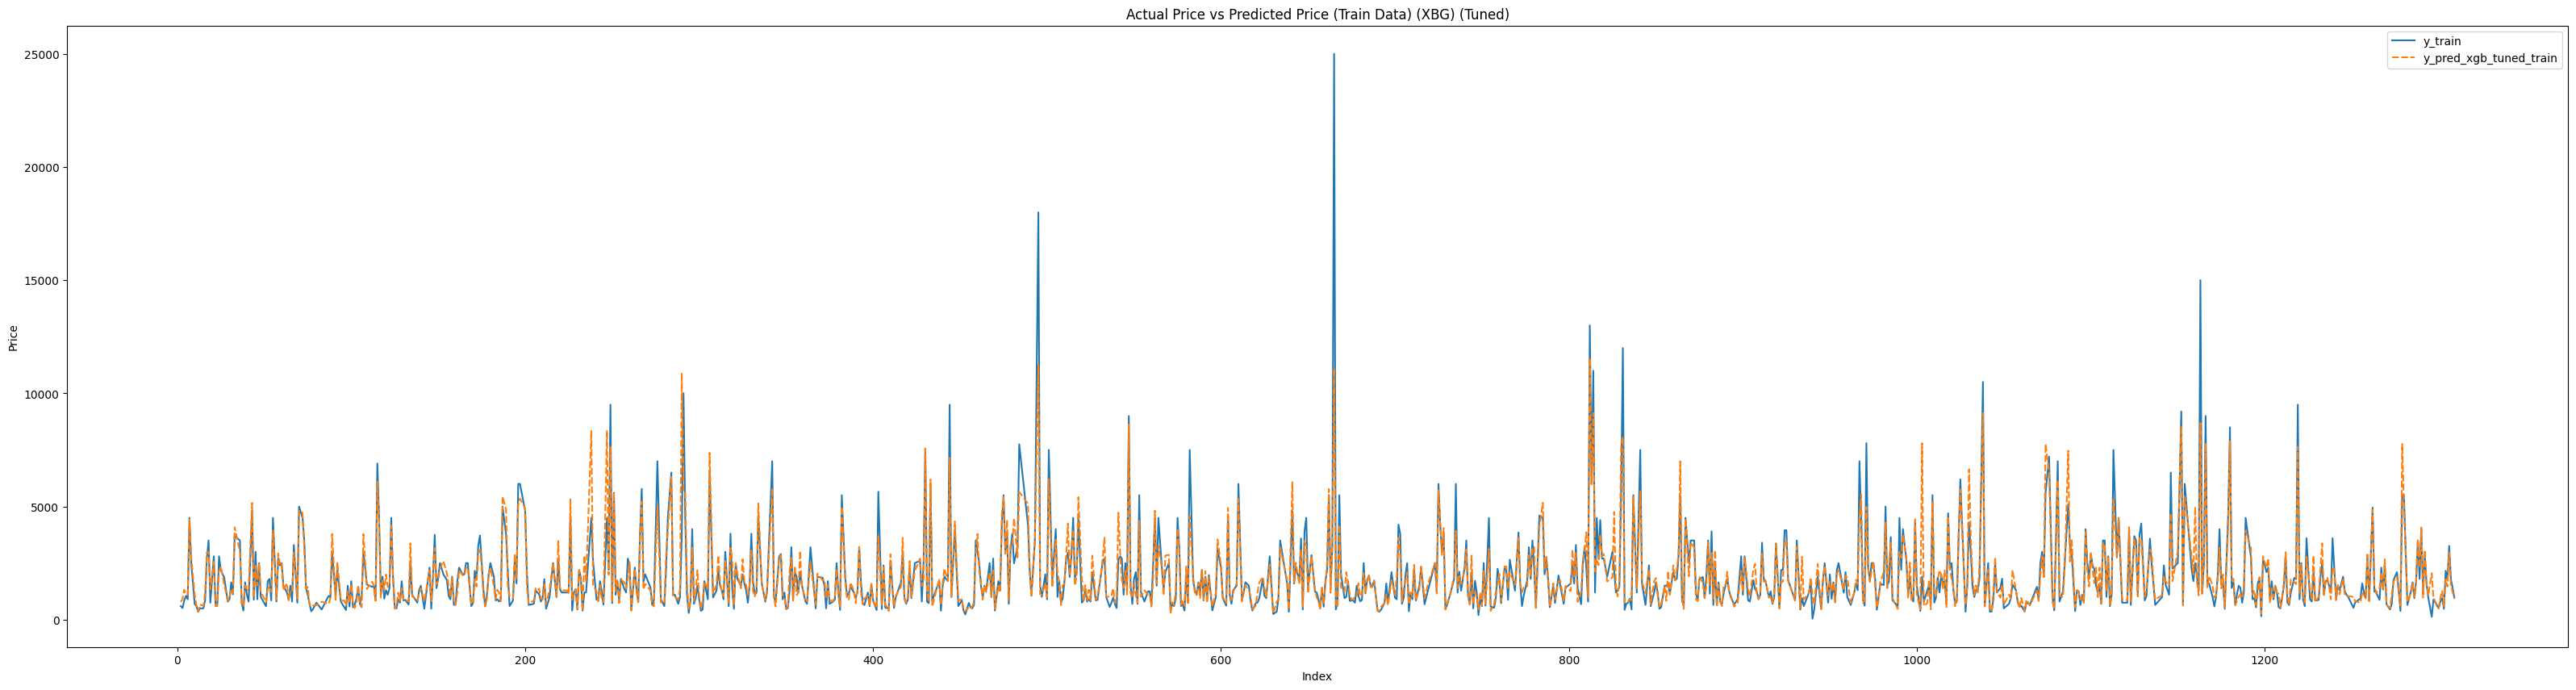

C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


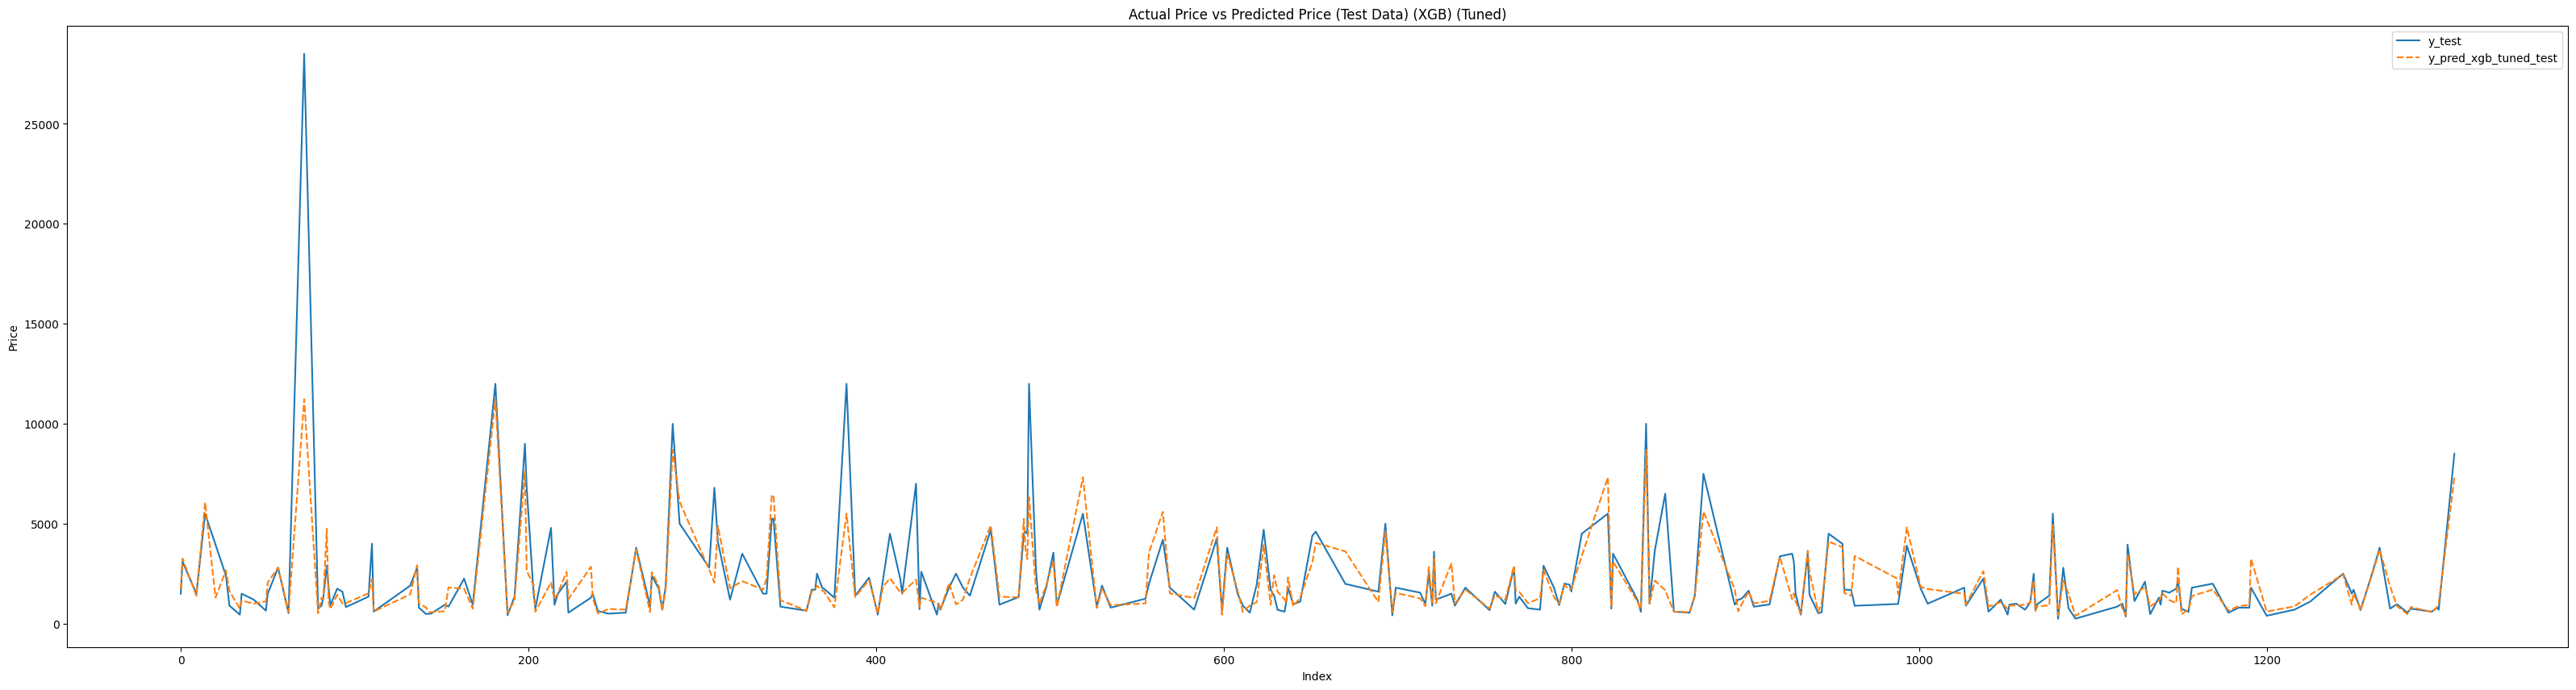

In [92]:
# visualize the y_train and y_train_pred to line chart

plt.figure(figsize=(40,10))
sns.lineplot(data=pd.DataFrame({'y_train':y_train, 'y_pred_xgb_tuned_train':y_pred_lgbm_train}))
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Actual Price vs Predicted Price (Train Data) (XBG) (Tuned)')
plt.show()

# visualize the y_test and y_test_pred

plt.figure(figsize=(40,10))
sns.lineplot(data=pd.DataFrame({'y_test':y_test, 'y_pred_xgb_tuned_test':y_pred_lgbm_test}))
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Actual Price vs Predicted Price (Test Data) (XGB) (Tuned)')
plt.show()



### Decision Tree Hyperparamter Tunning

In [78]:
# use best parameters
model_dt_tuned = DecisionTreeRegressor(
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=42
)

# fit the tuned model
model_dt_tuned.fit(X_train_transformed, y_train)

# predict the target
y_pred_dt_tuned_train = model_dt_tuned.predict(X_train_transformed)
y_pred_dt_tuned_test = model_dt_tuned.predict(X_test_transformed)

# compile all results in a dataframe
results_dt_tuned = pd.DataFrame({
    'Model': ['Decision Tree', 'Decision Tree Tuned'],
    'Training Score': [model_dt.score(X_train_transformed, y_train), model_dt_tuned.score(X_train_transformed, y_train)],
    'Testing Score': [model_dt.score(X_test_transformed, y_test), model_dt_tuned.score(X_test_transformed, y_test)],
})

# Print the results
results_dt_tuned

,Model,Training Score,Testing Score
0,Decision Tree,0.722655,0.681664
1,Decision Tree Tuned,0.588262,0.635195


### Lasso Regression Hyper Parameter Tunning

In [79]:
# use best parameters
model_lasso_tuned = Lasso(
    alpha=34,         # Regularization parameter
    fit_intercept=True, # Fit the intercept or not
    random_state=42    # Seed for reproducibility
)

# fit the tuned model
model_lasso_tuned.fit(X_train_transformed, y_train)

# predict the target
y_pred_lasso_tuned_train = model_lasso_tuned.predict(X_train_transformed)
y_pred_lasso_tuned_test = model_lasso_tuned.predict(X_test_transformed)

# compile all results in a dataframe
results_lasso_tuned = pd.DataFrame({
    'Model': ['Lasso Regression', 'Lasso Regression Tuned'],
    'Training Score': [model_lasso.score(X_train_transformed, y_train), model_lasso_tuned.score(X_train_transformed, y_train)],
    'Testing Score': [model_lasso.score(X_test_transformed, y_test), model_lasso_tuned.score(X_test_transformed, y_test)],
})

# Print the results
results_lasso_tuned

,Model,Training Score,Testing Score
0,Lasso Regression,0.697432,0.542565
1,Lasso Regression Tuned,0.667291,0.669341


### Gradient Boosting Regression

In [80]:
# use best parameters
model_gbr_tuned = GradientBoostingRegressor(
    loss='huber',           # Loss function to be optimized ('ls' for least squares regression)
    learning_rate=0.1,    # Step size shrinkage used to prevent overfitting
    n_estimators=110,     # Number of boosting stages to be run
    max_depth=3,          # Maximum depth of the individual trees
    min_samples_split=2,  # Minimum number of samples required to split an internal node
    min_samples_leaf=1,   # Minimum number of samples required to be at a leaf node
    subsample=0.911,        # Fraction of samples used for fitting the trees
    random_state=42,
    max_features = 'log2',
)

# fit the tuned model
model_gbr_tuned.fit(X_train_transformed, y_train)

# predict the target
y_pred_gbr_tuned_train = model_gbr_tuned.predict(X_train_transformed)
y_pred_gbr_tuned_test = model_gbr_tuned.predict(X_test_transformed)

# compile all results in a dataframe
results_lasso_tuned = pd.DataFrame({
    'Model': ['Gradient Boosting Regressor', 'Gradient Boosting Regressor Tuned'],
    'Training Score': [model_gbr.score(X_train_transformed, y_train), model_gbr_tuned.score(X_train_transformed, y_train)],
    'Testing Score': [model_gbr.score(X_test_transformed, y_test), model_gbr_tuned.score(X_test_transformed, y_test)],
})

# Print the results
results_lasso_tuned

,Model,Training Score,Testing Score
0,Gradient Boosting Regressor,0.831602,0.752246
1,Gradient Boosting Regressor Tuned,0.815013,0.814877


## EDA for checking on the missprediction

- Q1 Q2 
- Ilanign mutlak bandingin banyakan yg overshoot / undershoot
- gap antara prediksi dan actual terbesar terkecil

In [81]:
# check for missprediction with more than 30% error in random forest

miss_pred_rf = X_test.copy()
miss_pred_rf['actual'] = y_test
miss_pred_rf['predicted'] = y_pred_rf_test
miss_pred_rf['error'] = abs(miss_pred_rf['actual'] - miss_pred_rf['predicted'])
miss_pred_rf['error_percentage'] = (miss_pred_rf['error'] / miss_pred_rf['actual']) * 100

miss_pred_rf[miss_pred_rf['error_percentage'] > 30]

,Lokasi,Kamar Tidur,Kamar Mandi,Luas Tanah,Luas Bangunan,Sertifikat,Daya Listrik,actual,predicted,error,error_percentage
1299,"Balikpapan Selatan, Balikpapan",3.0,2.0,72,100,SHM - Sertifikat Hak Milik,1300,700.0,1050.533333,350.533333,50.076190
927,"Balikpapan Selatan, Balikpapan",5.0,3.0,330,100,SHM - Sertifikat Hak Milik,2200,3500.0,1903.600000,1596.400000,45.611429
488,"Balikpapan Selatan, Balikpapan",5.0,4.0,700,550,SHM - Sertifikat Hak Milik,5500,12000.0,5487.600000,6512.400000,54.270000
471,"Balikpapan Selatan, Balikpapan",3.0,2.0,128,75,SHM - Sertifikat Hak Milik,2200,950.0,1449.200000,499.200000,52.547368
213,"Balikpapan Selatan, Balikpapan",4.0,3.0,374,180,"Lainnya (PPJB,Girik,Adat,dll)",2200,4790.0,2148.120000,2641.880000,55.154071
...,...,...,...,...,...,...,...,...,...,...,...
1114,"Balikpapan Utara, Balikpapan",3.0,3.0,144,140,SHM - Sertifikat Hak Milik,3500,850.0,1519.666667,669.666667,78.784314
494,"Balikpapan Tengah, Balikpapan",3.0,2.0,144,120,SHM - Sertifikat Hak Milik,1300,700.0,1019.805000,319.805000,45.686429
557,"Balikpapan Tengah, Balikpapan",5.0,3.0,300,400,SHM - Sertifikat Hak Milik,3500,2000.0,4160.900000,2160.900000,108.045000
199,"Balikpapan Selatan, Balikpapan",4.0,3.0,450,275,SHM - Sertifikat Hak Milik,2200,6800.0,2527.840476,4272.159524,62.825875


In [82]:
# count by area
miss_pred_rf[miss_pred_rf['error_percentage'] > 30]['Lokasi'].value_counts()

Lokasi
Balikpapan Selatan, Balikpapan    37
Balikpapan Utara, Balikpapan      17
Balikpapan Tengah, Balikpapan      7
Sepinggan, Balikpapan              5
Balikpapan Timur, Balikpapan       4
Balikpapan Baru, Balikpapan        3
Klandasan Ilir, Balikpapan         3
Damai, Balikpapan                  2
Gn. Samarinda, Balikpapan          2
Telaga Sari, Balikpapan            1
Klandasan Ulu, Balikpapan          1
Batakan, Balikpapan                1
Balikpapan Kota, Balikpapan        1
Batu Ampar, Balikpapan             1
Name: count, dtype: int64

In [83]:
# count by Kamar Tidur
miss_pred_rf[miss_pred_rf['error_percentage'] > 30]['Kamar Tidur'].value_counts()

Kamar Tidur
3.0     25
2.0     22
4.0     18
5.0     12
6.0      4
15.0     2
7.0      1
9.0      1
Name: count, dtype: int64

In [84]:
# count by Kamar Mandi
miss_pred_rf[miss_pred_rf['error_percentage'] > 30]['Kamar Mandi'].value_counts()

Kamar Mandi
2.0     30
1.0     22
3.0     19
4.0     11
15.0     1
9.0      1
5.0      1
Name: count, dtype: int64

In [85]:
# count by Luas Tanah
miss_pred_rf[miss_pred_rf['error_percentage'] > 30]['Luas Tanah'].value_counts()

Luas Tanah
72     6
147    3
144    3
150    3
120    3
      ..
287    1
342    1
374    1
105    1
450    1
Name: count, Length: 61, dtype: int64

In [86]:
# count by Luas Bangunan
miss_pred_rf[miss_pred_rf['error_percentage'] > 30]['Luas Bangunan'].value_counts()

Luas Bangunan
200     8
300     5
150     4
100     3
120     3
36      3
160     3
70      3
90      2
48      2
380     2
80      2
350     2
45      2
145     2
180     2
61      1
75      1
125     1
255     1
91      1
250     1
176     1
175     1
72      1
49      1
98      1
38      1
60      1
130     1
108     1
140     1
400     1
65      1
40      1
93      1
92      1
240     1
109     1
110     1
1600    1
152     1
298     1
560     1
288     1
78      1
550     1
184     1
102     1
50      1
162     1
270     1
275     1
Name: count, dtype: int64

In [87]:
# count by Daya Listrik
miss_pred_rf[miss_pred_rf['error_percentage'] > 30]['Daya Listrik'].value_counts()

Daya Listrik
2200     29
1300     28
3500      8
5500      5
4400      5
16500     4
900       2
3300      2
10600     1
6600      1
Name: count, dtype: int64

In [88]:
# count by Sertifikat
miss_pred_rf[miss_pred_rf['error_percentage'] > 30]['Sertifikat'].value_counts()

Sertifikat
SHM - Sertifikat Hak Milik       70
HGB - Hak Guna Bangunan          13
Lainnya (PPJB,Girik,Adat,dll)     2
Name: count, dtype: int64